# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек

## Цель работы

Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.


# Основные теоритические положения

 Введём некоторые понятия:
 
 $ \lambda (n)  $ - уменьшенная на единицу длина двоичной записи числа $ n $.
 
 $ \nu (n) $ - вес Хэмминга( количество ненулевых значений в записи числа).

 Аддитивная цепочка для $ n \in N $ - последовательность такого вида: $ 1 = a_0, a_1, a_2, ..., a_m = n $ , в которой $ a_i = a_j + a_k $ ,  $    k \leqslant j < i  $ , $ \forall i = 1..m $ .
 
Функция $ l(n) $  - наименьшая длина аддитивной цепочки.

Типы шагов:
    
   1) Удвоение, если $ j = k = i - 1 $ .

   2) Звездный, если $ j = i - 1 $ .

   3) Малый, если $ \lambda (a_i) = \lambda (a_{i-1}) $ .
   
 Звездная цепочка - аддитивная цепочка, состоящая только из звездных шагов.
 
 Пусть иммется звездная цепочка $ \{a_i\}_{i=1}^m $ . Тогда вектор индексов определяется, как  $ \{r_i\}_{i=1}^{m-1} $ , где $ r_i = \{x: 1 \leqslant x \leqslant i\} $ , а $ a_i = a_{i-1} + a_{r_{i-1}} $ , $ 2 \leqslant i \leqslant m-1 $ .

Следствие теоремы Брауэра:

$ \lim_{n\to\infty} \frac{l(n)}{\lambda(n)} = 1 $ . (1)

Гипотеза Шольца-Брауэра:

$ l(2^n - 1) \leqslant l(n) + n - 1  $ для $ n \leqslant 64 $ .   (2)



## Постановка задачи

Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Порядок выполнения работы

1. Применить бинарный метод и метод множителей для $ x^n $, где $ n⩾30 $, для 2-3 значений $ n $ (значения $ n $ выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.

2. Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра $ k $, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.

3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при $ n>500 $. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.

4. Проверить теорему Брауэра для $ n=1..200 $ путём построения функции $ l(n) $ и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.
5. Проверить гипотезу Шольца–Брауэра для $ 1⩽n⩽10 $ на алгоритме дробления вектора индексов. Сделать выводы.





## Выполнение работы

1. Приведём реалитзацию бинарного метода:

In [ ]:
def bin_meth (x, n):
    buf_x = x
    b = []
    while (n):
        if (n % 2):
            b.append('X')
            b.append('S')
        else:
            b.append('S')
        n = n // 2
    b.reverse()
    b = b[2:]
    for i in b:
        if (i == 'S'):
            x = x*x
        if (i == 'X'):
            x = x*buf_x
    return [x, len(b)]


l = bin_meth(int(input()), int(input()))
print(l[0], '\nКоличество операций: ', l[1])

И реализацию метода множителей:

In [ ]:
def is_simple(n):
    i = 2
    while (i*i <= n):
        if (n % i == 0):
            return False
        i += 1
    return True

def simple_multiplie(n):
    for i in range(2, n+1):
        if (n % i == 0) and is_simple(i):
            return i


x = int(input())
n = int(input())
flag = False
k = simple_multiplie(n)
if (k == n):
    n = n-1
    k = simple_multiplie(n)
    flag = True
l = bin_meth(x, k)
d = bin_meth(l[0], int(n/k))
if (flag):
    d[0] *= x
    d[1] += 1
print(d[0], '\nКоличество операций: ', l[1]+d[1])

Проведём несколько тестов и сравним результаты.

  N             |  Бинарный метод| Метод множителей
:-------------: | :------------: | :---------------:
255             | 13             |   10
81              | 7              |   8
421             | 11             |   11

При $ n = 255 $ бинарный метод справился за 14 операций, когда как методу множителей понадобилось всего 11. При $ n = 81 $ бинарному методу потребовалось 8 операций, а методу множителей - 9. Можно прийти к выводу о том, что данные методы выполняют вычисления за примерное схожее количество операций, но метод множителей в среднем даёт лучшие результаты.



2. Приведём реализацию алгоритма Яо: 

In [ ]:
def d (z, a, k):
    sum = 0
    for i in range(0, len(a)):
        if z == a[i]:
            sum += 2 ** (i * k)
    return sum


def simp_bin_meth (n):
    b = []
    while (n):
        if (n % 2):
            b.append('X')
            b.append('S')
        else:
            b.append('S')
        n = n // 2
    b.reverse()
    b = b[2:]
    vector = []
    n = 1
    vector.append(n)
    for i in b:
        if (i == 'S'):
            n = n + n
        if (i == 'X'):
            n = n + 1
        vector.append(n)
    return vector



n = int(input())
k = int(input())
a = []
buf_n = n
while(n):
    a.append(n % (2 ** k))
    n = n // (2 ** k)
n = buf_n

chain = set()
for i in range(0, len(a)*k):
    chain.add(2 ** i)
z = []
for i in range(1, 2**k ):
    z.append(i)
new_z  = []
for i in z:
    if d(i, a, k) != 0:
        new_z.append(i)
z = new_z
buff = 0
for i in z:
    vector = simp_bin_meth(i)
    buff += i * d(i, a, k)
    for j in vector:
        chain.add(j * d(i, a, k))
    chain.add(buff)
chain = sorted(chain)
print("Аддитивная цепоччка: ", chain, "\nДлина аддитивной цепочки: ", len(chain))

Проведём несколько тестов и сопоставим длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. 

 N              |  Алгоритм Яо   | Минимальная АЦ
:-------------: | :------------: | :---------------:
56              | 8              |   7
273             | 10             |   10
580             | 11             |   11

Можно сделать выводы о том, что полученный алгоритмом Яо аддитивные цепочки не являются минимальными, но достаточно близки к ним.

3. Приведём реализацию алгоритма дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа:


In [20]:
import time
start_time = time.time()

def init_v (n):
    if(n != 1):
        return init_v(n // 2) + n % 2
    else:
        return 1


def init_vector(m):
    return [1 for x in range(m)]

def init_vector2(m):
    vector = []
    for i in range(1, m):
        vector.append(i)
    return vector


def next_vector_first(vector, q):
    for i in range(q, 1, -1):
        if vector[i-1] > 1:
            vector[i-1] -= 1
            break
        if(vector[i-1] == 1):
            vector[i-1] = i
    return vector


def next_vector_second(vector, q, m):
    for i in range(m, q, -1):
        if vector[i-1] > 1:
            vector[i-1] -= 1
            break
        if(vector[i-1] == 1):
            vector[i-1] = i
    return vector


n = int(input())
low_l = n.bit_length()
high_l = low_l + init_v(n) - 1
flag = 0
for m in range(low_l, high_l + 1):
    vector = init_vector2(m)
    q = m // 2 - 1

    while True:
        chain = []
        chain.append(1)
        for i in vector:
            chain.append(chain[-1] + chain[i-1])
        if chain[m-1] == n:
            flag = 1
            break
        a_min = chain[q] + m - q
        a_max = chain[q]*2**(m - q )
        if n in range(a_min, a_max + 1):
            vector = next_vector_second(vector, q, m-1)
            if vector[q:] == init_vector(m-q-1):
                break
        else:
            vector = next_vector_first(vector, q)
            if vector[:q] == init_vector(q):
                break
    if flag:
        break


print(" %s seconds" % (time.time() - start_time))        
        
print('vector = ', vector)
print('chain = ', chain)


1023
 39.984015226364136 seconds
vector =  [1, 2, 3, 4, 5, 6, 7, 8, 7, 5, 3, 1, 13, 13]
chain =  [1, 2, 4, 8, 16, 32, 64, 128, 256, 320, 336, 340, 341, 682, 1023]


Проведём тестирование алгоритма при $ n \geqslant 500 $.

 N              |  Время выполнения алгоритма дробления ВИ| Длина ЗЦ   
:-------------: | :------------:                          | :-------:
580             | 3.69938                                 | 11
937             | 12.5778                                 | 13
1023            | 33.69758                                | 13

Можно сделать вывод о том, что алгоритм дробления ВИ занимает большее время, чем остальные методы, но для относительно небольших чисел более точно находит минимальную АЦ. 


4. Проверим следствие теоремы Брауэра. Для этого построим график функции $ l(n) $  и аппроксимирующую прямую к этой функции. Также на графике другим цветом представлена функция  $ \lambda (n)  $.

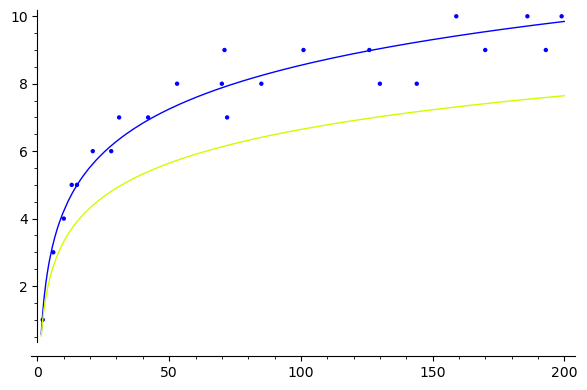

In [19]:
xi = [2, 6, 10, 13, 15, 21, 28, 31, 42, 53, 60, 70, 71, 72, 85, 96, 101, 126, 130, 144, 159, 170, 186, 193, 199]
y = [1, 3, 4, 5, 5, 6, 6, 7, 7, 8, 7, 8, 9, 7, 8, 8, 9, 9, 8, 10, 10, 9, 10, 9, 10]

sum_xy = 0
sum_x = 0
sum_y = 0
sum_quart_x = 0

for i in range(len(xi)):
        sum_xy += y[i] * log(xi[i],2)
        sum_x += log(xi[i],2) 
        sum_y += y[i]
        sum_quart_x += log(xi[i],2)**2
   


a = (len(xi)*sum_xy - sum_x*sum_y)/(len(xi)*sum_quart_x - sum_x**2)
b = (sum_y - a*sum_x)/len(xi)

x = var('x')

p1 = point([(2,1), (6,3), (10, 4), (13, 5), (15, 5), (21, 6), (28, 6), (31, 7), (42, 7), (53, 8), (70, 8),
      (71, 9), (72, 7), (85, 8), (101, 9), (126, 9),(130, 8), (144, 8), (159, 10), (170, 9), (186, 10), (193, 9), (199, 10)])
p2 = plot(a*log(x,2) + b, (x, 0, 200))
p3 = plot(log(x, 2), (x,0,200), rgbcolor=hue(0.2)) 
show(p1+p2+p3)
    


Из графика видно, что функции растут примерно с одинаковой скоростью. 


5. Проверим теорему Шольца–Брауэра. Проведём для нескольких n алгоритм дробления ВИ и проверим неравенство (2).

 N              |  Длина ЗЦ   
:-------------: | :------------:                        
2               | 1                                 
3               | 2                               
5               | 3      
31              | 7   
7               | 4 
127             | 10
10              | 4
1023            | 13


Например при $ n = 5 $:

   $ l(2^5-1) = l(5) + 5 - 1 $
   
   $ l(31) = 3 + 5 - 1 $
   
   $ 7 = 7 $
   
Следовательно, гипотеза для $ n \leqslant 10 $ доказана.
  
  
## Вывод

Реализованы точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек. Были реализованы такие алгоритмы, как бинарный метод, метод множителей, алгоритм Яо, алгоритм дробления вектора индексов. Для каждого алгоритма были проведены тесты. Были проверены следствие теоремы Брауэра и гипотеза Шольца–Брауэра. 